# This notebook test the difference between the triaging time of the current and next release when approaching the next release.

In [128]:
import pandas as pd
import os
import json
import csv
import re, datetime
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
from lifelines.statistics import logrank_test
from lifelines import KaplanMeierFitter

from global_functions import *

In [144]:
from scipy import stats

def compare_distributions(tt,var1,var2,what): 
    if (len(tt[tt[what]==var1].triaging_time.values.tolist())==0) | (len(tt[tt[what]==var2].triaging_time.values.tolist())==0):
        print('zero array',len(tt[tt[what]==var1].triaging_time.values.tolist()))
        return 0
    normal_test_var1 = stats.kstest(tt[tt[what]==var1].triaging_time.values.tolist(), 'norm')
    normal_test_var2 = stats.kstest(tt[tt[what]==var2].triaging_time.values.tolist(), 'norm')
    
    #tt[[var1, var2]].plot(kind='box')
    
    #not normal distribution
    if normal_test_var1.pvalue<0.05 or  normal_test_var2.pvalue<0.05:
        print('At least one sample not normally distributed')
        #wilkoxon
        wresult = stats.ranksums(tt[tt[what]==var1].triaging_time, tt[tt[what]==var2].triaging_time)
        
        if wresult.pvalue<0.05:
            print('Statistically significant difference found for:'+var)
        else:
            print('Statistically significant difference NOT found for:'+var)
        print(wresult)
    else:
        print('Both samples are normally distributed')
        #t-test
        tresult = stats.ttest_rel(tt[tt[what]==var1].triaging_time, tt[tt[what]==var2].triaging_time)

        if tresult.pvalue<0.05:
            print('Statistically significant difference found for:'+var)
        else:
            print('Statistically significant difference NOT found for:'+var)
        print(tresult)
 

In [145]:
from scipy import stats

def compare_distributions_fixing(tt,var1,var2,what): 
    if (len(tt[tt[what]==var1].fixing_time.values.tolist())==0) | (len(tt[tt[what]==var2].fixing_time.values.tolist())==0):
        print('zero array',len(tt[tt[what]==var1].fixing_time.values.tolist()))
        return 0
    normal_test_var1 = stats.kstest(tt[tt[what]==var1].fixing_time.values.tolist(), 'norm')
    normal_test_var2 = stats.kstest(tt[tt[what]==var2].fixing_time.values.tolist(), 'norm')
    
    #tt[[var1, var2]].plot(kind='box')
    
    #not normal distribution
    if normal_test_var1.pvalue<0.05 or  normal_test_var2.pvalue<0.05:
        print('At least one sample not normally distributed')
        #wilkoxon
        wresult = stats.ranksums(tt[tt[what]==var1].fixing_time, tt[tt[what]==var2].fixing_time)
        
        if wresult.pvalue<0.05:
            print('Statistically significant difference found for:'+var)
        else:
            print('Statistically significant difference NOT found for:'+var)
        print(wresult)
    else:
        print('Both samples are normally distributed')
        #t-test
        tresult = stats.ttest_rel(tt[tt[what]==var1].fixing_time, tt[tt[what]==var2].fixingf_time)

        if tresult.pvalue<0.05:
            print('Statistically significant difference found for:'+var)
        else:
            print('Statistically significant difference NOT found for:'+var)
        print(tresult)
 

In [146]:
release_creation_ts_all = get_release_dates()

In [147]:
#load the traiging time of the next release bugs when approchung the next release
file_target_e = 'data'+os.sep+'RQ3'+os.sep+'time_assign_E_2.csv.gz'
df_total = pd.read_csv(file_target_e,index_col=False,compression='gzip',dtype={'release':str})
df_total['type']='next'
df_total.head()


,id,month,triaging_time,release,type
0,64617,12,11,3.0,next
1,64621,12,0,3.0,next
2,64626,12,0,3.0,next
3,64627,12,0,3.0,next
4,64628,12,0,3.0,next


In [148]:
#load the traiging time of the current release bugs when approchung the next release
file_target_e = 'data'+os.sep+'RQ3'+os.sep+'time_assign_E.csv.gz'
df_total2 = pd.read_csv(file_target_e,index_col=False,compression='gzip',dtype={'release':str})
#df_total2['release']=df_total2.apply(lambda x : predecessor(list(release_creation_ts_all.keys()),x['release']), axis=1)
df_total2['type']='current'
df_total2.head()

,id,month,triaging_time,release,type
0,101046,12,0,3.1,current
1,101423,12,0,3.1,current
2,101428,12,0,3.1,current
3,101447,12,0,3.1,current
4,101634,12,0,3.1,current


In [149]:
total=df_total2.append(df_total)
total.head()

,id,month,triaging_time,release,type
0,101046,12,0,3.1,current
1,101423,12,0,3.1,current
2,101428,12,0,3.1,current
3,101447,12,0,3.1,current
4,101634,12,0,3.1,current


In [150]:
#get the three last months before a release
last_3months=total[total['month'].isin([10,11,12])]

In [151]:
last_3months.head()

,id,month,triaging_time,release,type
0,101046,12,0,3.1,current
1,101423,12,0,3.1,current
2,101428,12,0,3.1,current
3,101447,12,0,3.1,current
4,101634,12,0,3.1,current


In [152]:

#test if there is a statistical difference between triaging time for the current and next release in the last 3 months
print('triaging time for the current and next release in the last 3 months')
var='triaging time for the current and next release in the last 3 months'
#compare_distributions(last_3months,'current','next','type')
for release in last_3months.release.unique():
    print(release)
    compare_distributions(last_3months[last_3months['release']==release],'current','next','type')

triaging time for the current and next release in the last 3 months
3.1
At least one sample not normally distributed
Statistically significant difference found for:triaging time for the current and next release in the last 3 months
RanksumsResult(statistic=7.835062523528753, pvalue=4.686094648383326e-15)
3.2
At least one sample not normally distributed
Statistically significant difference found for:triaging time for the current and next release in the last 3 months
RanksumsResult(statistic=13.212543025810863, pvalue=7.427212666108468e-40)
3.3
At least one sample not normally distributed
Statistically significant difference found for:triaging time for the current and next release in the last 3 months
RanksumsResult(statistic=23.83122669480297, pvalue=1.5855201300703672e-125)
3.4
At least one sample not normally distributed
Statistically significant difference found for:triaging time for the current and next release in the last 3 months
RanksumsResult(statistic=5.668092546470933, pvalue=

In [153]:
#test if there is a statistical difference between triaging time for the current release in the last 3 months and first 9 months
last_3months=total[(total['month'].isin([10,11,12])) & (total['type']=='current')]
last_3months['when']='last'
first_9months=total[(~total['month'].isin([10,11,12])) & (total['type']=='current') ]
first_9months['when']='first'
df_current=last_3months.append(first_9months)
#test if there is a statistical difference for triaging time for the next release in the last 3 months and first 9 months


C:\Users\zeinab\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\zeinab\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [154]:
#test if there is a statistical difference for triaging time for the next release in the last 3 months and first 9 months

last_3months=total[(total['month'].isin([10,11,12])) & (total['type']=='next')]
last_3months['when']='last'
first_9months=total[(~total['month'].isin([10,11,12])) & (total['type']=='next') ]
first_9months['when']='first'
df_next=last_3months.append(first_9months)

C:\Users\zeinab\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\zeinab\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [155]:
df_tall=df_next.append(df_current)

In [156]:
df_tall.loc[df_tall['when']=='first','when'] = '1-9 months'
df_tall.loc[df_tall['when']=='last','when'] = '10-12 months'  

3.0


C:\Users\zeinab\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


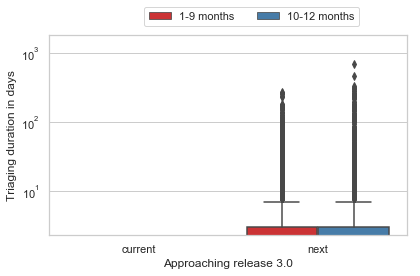

3.1


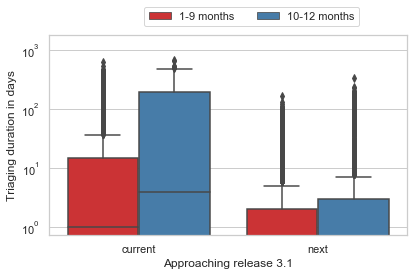

3.2


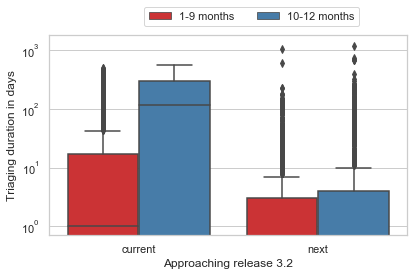

3.3


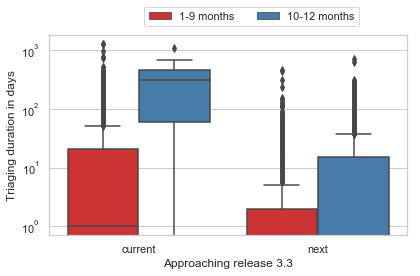

3.4


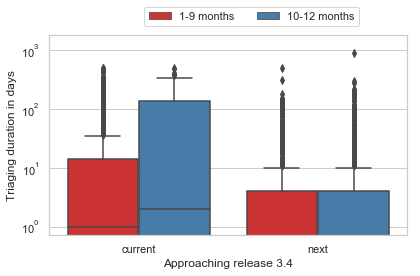

3.5


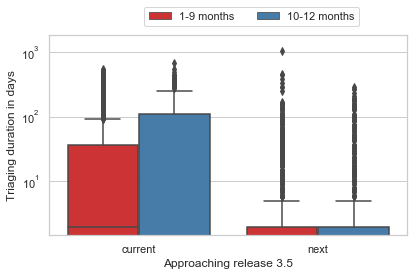

3.6


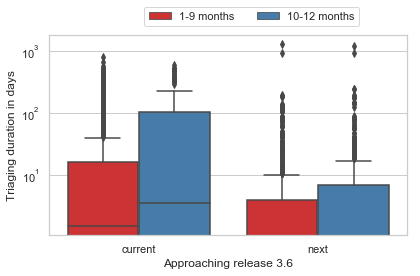

3.7


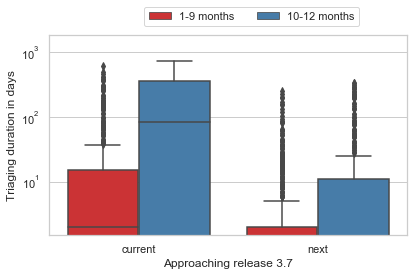

4.2


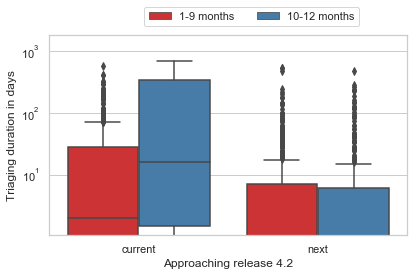

4.3


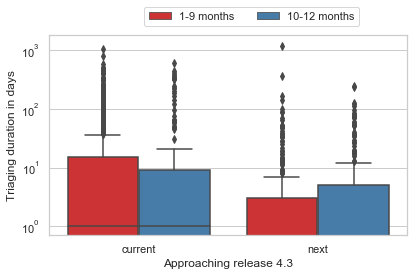

4.4


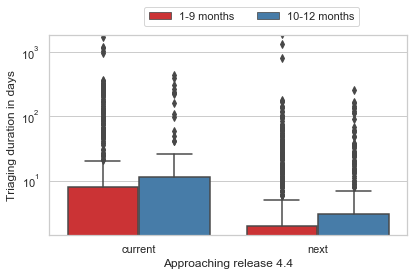

4.5


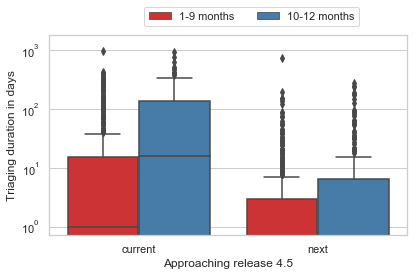

4.6


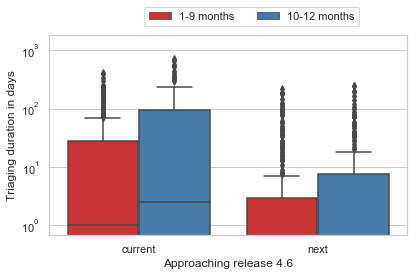

4.7


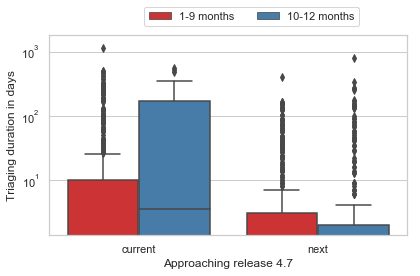

4.8


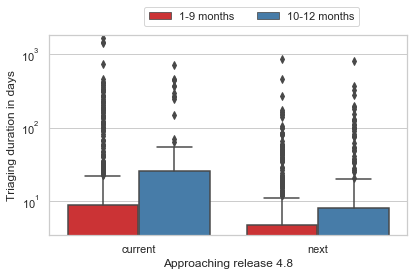

4.9


C:\Users\zeinab\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


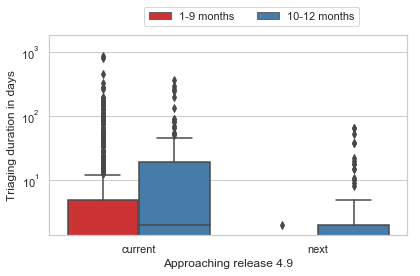

4.10


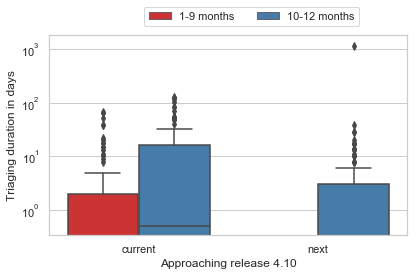

In [157]:
#show only the last three months before a release
r_month=[10,11,12]

releases_only = df_tall[['release']].drop_duplicates()
releases_only = sort_df(releases_only,'release')
releases_only = releases_only[['release']]

for release in releases_only.release.unique():
#release='4.3'
    release=str(release)
    if (release!='4.9') & (release!='4.10'):
        print(release)
        sns.set(style="whitegrid")
        draft=df_tall[(df_tall['release']==release)   ]
        ax = plt.subplot(1, 1,1)
        
         
        g=sns.boxplot(x="type", y="triaging_time", hue="when",
              data=draft, palette="Set1",hue_order=['1-9 months','10-12 months'], order=["current", "next"])
        ax.set_xlabel("Approaching release "+release)
        ax.set_ylabel("Triaging duration in days")
        ax.set_yscale('log')
        ax.set_ylim(0, 1800)
        plt.legend(bbox_to_anchor=(0.25, 1.02, 1., .102), loc='lower left',
           ncol=2)
        #new_labels = ['label 1', 'label 2']
        #for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
        plt.tight_layout( )
        plt.show()
        ax.get_figure().savefig('..'+os.sep+'paper'+os.sep+'figs'+os.sep+'RQ3'+os.sep+'triagingRate_final'+release.replace('.', '-')+'.pdf', bbox_inches="tight")
        
    else:
        print(release)
        sns.set(style="whitegrid")
        draft=df_tall[(df_tall['release']==release)]
        ax = plt.subplot(1, 1,1)  
        sns.boxplot(x="type", y="triaging_time", hue="when",
              data=draft, palette="Set1",hue_order=['1-9 months','10-12 months'], order=["current", "next"])
        ax.set_xlabel("Approaching release "+release)
        ax.set_ylabel("Triaging duration in days")
        ax.set_yscale('log')
        ax.set_ylim(0, 1800)
        #ax.set_xticklabels( ('1', '2','3') )
        plt.legend(bbox_to_anchor=(0.25, 1.02, 1., .102), loc='lower left',
           ncol=2)

        plt.tight_layout( )
        plt.show()
        ax.get_figure().savefig('..'+os.sep+'paper'+os.sep+'figs'+os.sep+'RQ3'+os.sep+'triagingRate_final'+release.replace('.', '-')+'.pdf', bbox_inches="tight")            
#plt.savefig('rq3t4-4.pdf')

In [158]:
var='triaging time for the current release in the last 3 months and first 9 months'
for release in df_current.release.unique():
    print(release)
    compare_distributions(df_current[df_current['release']==release],'first','last','when')

3.1
At least one sample not normally distributed
Statistically significant difference found for:triaging time for the current release in the last 3 months and first 9 months
RanksumsResult(statistic=-4.824795248738928, pvalue=1.4014716650707652e-06)
3.2
At least one sample not normally distributed
Statistically significant difference found for:triaging time for the current release in the last 3 months and first 9 months
RanksumsResult(statistic=-10.503373628669584, pvalue=8.334704621073995e-26)
3.3
At least one sample not normally distributed
Statistically significant difference found for:triaging time for the current release in the last 3 months and first 9 months
RanksumsResult(statistic=-21.948509957005776, pvalue=8.94866644315407e-107)
3.4
At least one sample not normally distributed
Statistically significant difference found for:triaging time for the current release in the last 3 months and first 9 months
RanksumsResult(statistic=-2.8924403845808797, pvalue=0.0038226171945124716)


In [159]:
var='triaging time for the next release in the last 3 months and first 9 months'
for release in df_next.release.unique():
    print(release)
    compare_distributions(df_next[df_next['release']==release],'first','last','when')

3.0
At least one sample not normally distributed
Statistically significant difference NOT found for:triaging time for the next release in the last 3 months and first 9 months
RanksumsResult(statistic=-0.17912542077479593, pvalue=0.8578392219179767)
3.1
At least one sample not normally distributed
Statistically significant difference found for:triaging time for the next release in the last 3 months and first 9 months
RanksumsResult(statistic=-2.8679504800138518, pvalue=0.004131401915319859)
3.2
At least one sample not normally distributed
Statistically significant difference found for:triaging time for the next release in the last 3 months and first 9 months
RanksumsResult(statistic=-2.3434980442690483, pvalue=0.019103862401609998)
3.3
At least one sample not normally distributed
Statistically significant difference found for:triaging time for the next release in the last 3 months and first 9 months
RanksumsResult(statistic=-7.8940946683712845, pvalue=2.9243014164719395e-15)
3.4
At leas

In [160]:
df_next.head()

   

,id,month,triaging_time,release,type,when
0,64617,12,11,3.0,next,last
1,64621,12,0,3.0,next,last
2,64626,12,0,3.0,next,last
3,64627,12,0,3.0,next,last
4,64628,12,0,3.0,next,last


# Fixing data

In [161]:
#load the traiging time of the next release bugs when approchung the next release
file_target_e = 'data'+os.sep+'RQ3'+os.sep+'time_fix_E_2.csv.gz'
df_total = pd.read_csv(file_target_e,index_col=False,compression='gzip',dtype={'release':str})
df_total['type']='next'
df_total.head()
#load the traiging time of the current release bugs when approchung the next release
file_target_e = 'data'+os.sep+'RQ3'+os.sep+'time_fix_E.csv.gz'
df_total2 = pd.read_csv(file_target_e,index_col=False,compression='gzip',dtype={'release':str})
#df_total2['release']=df_total2.apply(lambda x : predecessor(list(release_creation_ts_all.keys()),x['release']), axis=1)
df_total2['type']='current'
df_total2.head()

,id,month,fixing_time,release,type
0,100923,12,1,3.1,current
1,101160,12,0,3.1,current
2,65216,12,372,3.1,current
3,65775,12,376,3.1,current
4,65786,12,362,3.1,current


In [162]:
total=df_total2.append(df_total)

In [163]:
#get the three last months before a release
last_3months=total[total['month'].isin([10,11,12])]
#test if there is a statistical difference between fixing time for the current and next release in the last 3 months
var='fixing time for the current and next release in the last 3 months'
for release in last_3months.release.unique():
    print(release)
    compare_distributions_fixing(last_3months[last_3months['release']==release],'current','next','type')

3.1
At least one sample not normally distributed
Statistically significant difference found for:fixing time for the current and next release in the last 3 months
RanksumsResult(statistic=24.382981352254536, pvalue=2.5919374008629747e-131)
3.2
At least one sample not normally distributed
Statistically significant difference found for:fixing time for the current and next release in the last 3 months
RanksumsResult(statistic=17.545232719000747, pvalue=6.468729270689337e-69)
3.3
At least one sample not normally distributed
Statistically significant difference found for:fixing time for the current and next release in the last 3 months
RanksumsResult(statistic=24.48658989155214, pvalue=2.052609986026399e-132)
3.4
At least one sample not normally distributed
Statistically significant difference found for:fixing time for the current and next release in the last 3 months
RanksumsResult(statistic=15.706540706065924, pvalue=1.3642267083424404e-55)
3.5
At least one sample not normally distributed


In [164]:
#test if there is a statistical difference between fixing time for the current release in the last 3 months and first 9 months
last_3months=total[(total['month'].isin([10,11,12])) & (total['type']=='current')]
last_3months['when']='last'
first_9months=total[(~total['month'].isin([10,11,12])) & (total['type']=='current') ]
first_9months['when']='first'
df_current=last_3months.append(first_9months)
#test if there is a statistical difference for fixing time for the next release in the last 3 months and first 9 months

last_3months=total[(total['month'].isin([10,11,12])) & (total['type']=='next')]
last_3months['when']='last'
first_9months=total[(~total['month'].isin([10,11,12])) & (total['type']=='next') ]
first_9months['when']='first'
df_next=last_3months.append(first_9months)

C:\Users\zeinab\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\zeinab\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\zeinab\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [165]:
var='fixing time for the current release in the last 3 months and first 9 months'
for release in df_current.release.unique():
    print(release)
    compare_distributions_fixing(df_current[df_current['release']==release],'first','last','when')

3.1
At least one sample not normally distributed
Statistically significant difference found for:fixing time for the current release in the last 3 months and first 9 months
RanksumsResult(statistic=-18.411009796763857, pvalue=1.0720494637817015e-75)
3.2
At least one sample not normally distributed
Statistically significant difference found for:fixing time for the current release in the last 3 months and first 9 months
RanksumsResult(statistic=-12.866525725485568, pvalue=6.945674391323397e-38)
3.3
At least one sample not normally distributed
Statistically significant difference found for:fixing time for the current release in the last 3 months and first 9 months
RanksumsResult(statistic=-18.7611111670299, pvalue=1.5708116234825316e-78)
3.4
At least one sample not normally distributed
Statistically significant difference found for:fixing time for the current release in the last 3 months and first 9 months
RanksumsResult(statistic=-9.663175528388445, pvalue=4.322530846804515e-22)
3.5
At le

In [166]:
var='fixing time for the next release in the last 3 months and first 9 months'
for release in df_next.release.unique():
    print(release)
    compare_distributions_fixing(df_next[df_next['release']==release],'first','last','when')

3.0
At least one sample not normally distributed
Statistically significant difference found for:fixing time for the next release in the last 3 months and first 9 months
RanksumsResult(statistic=-6.686324125065754, pvalue=2.2884587469517788e-11)
3.1
At least one sample not normally distributed
Statistically significant difference found for:fixing time for the next release in the last 3 months and first 9 months
RanksumsResult(statistic=-11.378393352117701, pvalue=5.3577675906175794e-30)
3.2
At least one sample not normally distributed
Statistically significant difference found for:fixing time for the next release in the last 3 months and first 9 months
RanksumsResult(statistic=-7.489703911638295, pvalue=6.902916076272071e-14)
3.3
At least one sample not normally distributed
Statistically significant difference found for:fixing time for the next release in the last 3 months and first 9 months
RanksumsResult(statistic=-7.315633380436346, pvalue=2.561701845959894e-13)
3.4
At least one samp

In [167]:
df_tall=df_next.append(df_current)

In [168]:
df_tall.head()

,id,month,fixing_time,release,type,when
0,64614,12,5,3.0,next,last
1,64617,12,11,3.0,next,last
2,64626,12,9,3.0,next,last
3,64627,12,10,3.0,next,last
4,64629,12,0,3.0,next,last


In [169]:
df_tall.loc[df_tall['when']=='first','when'] = '1-9 months'
df_tall.loc[df_tall['when']=='last','when'] = '10-12 months'         

3.0


C:\Users\zeinab\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


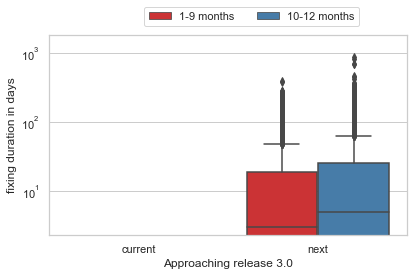

3.1


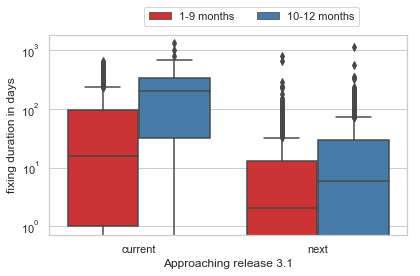

3.2


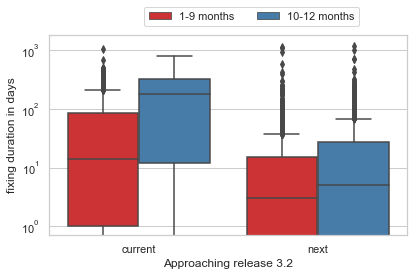

3.3


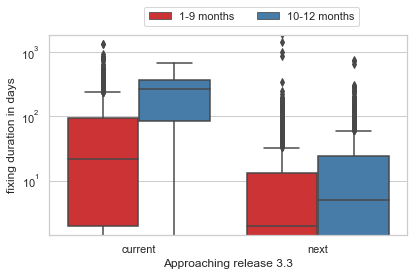

3.4


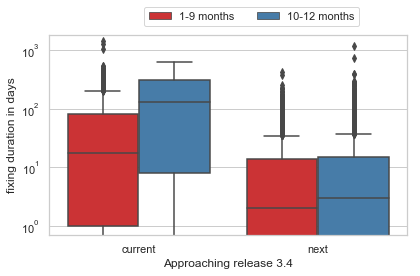

3.5


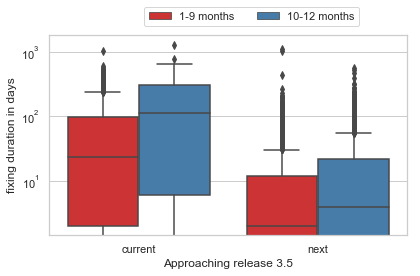

3.6


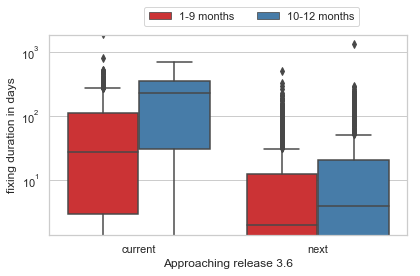

3.7


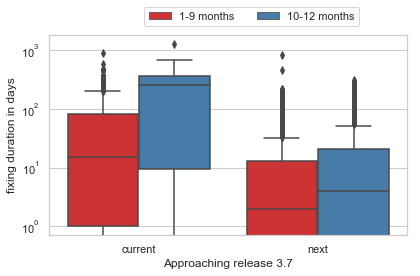

4.2


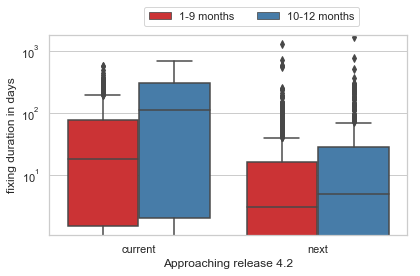

4.3


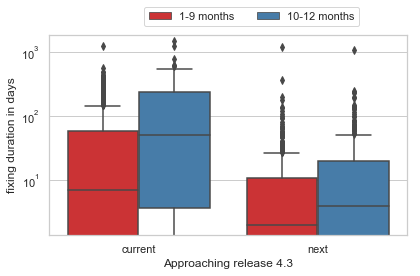

4.4


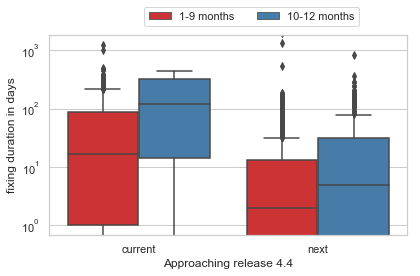

4.5


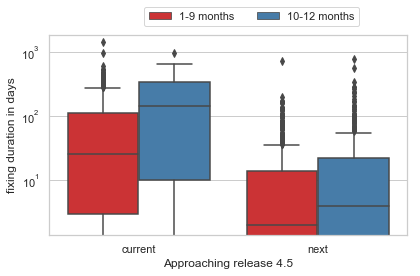

4.6


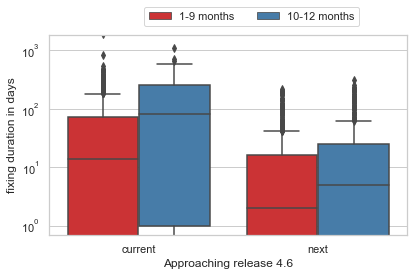

4.7


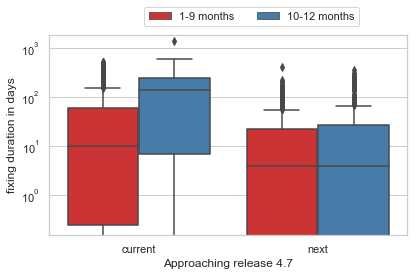

4.8


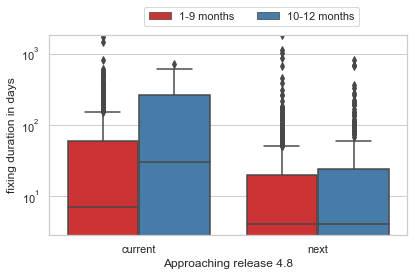

4.9


C:\Users\zeinab\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


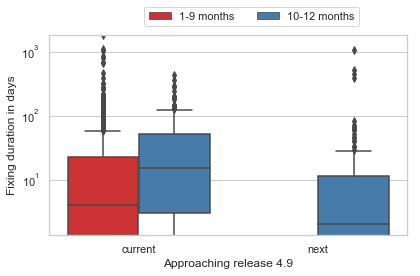

4.10


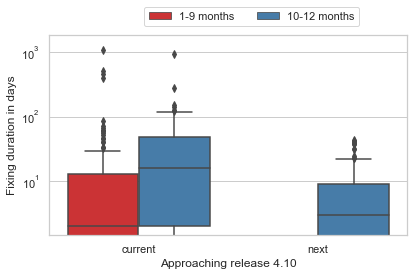

In [170]:
#show only the last three months before a release
r_month=[10,11,12]

releases_only = df_tall[['release']].drop_duplicates()
releases_only = sort_df(releases_only,'release')
releases_only = releases_only[['release']]

for release in releases_only.release.unique():
#release='4.3'
    release=str(release)
    if (release!='4.9') & (release!='4.10'):
        print(release)
        sns.set(style="whitegrid")
        draft=df_tall[(df_tall['release']==release)   ]
        ax = plt.subplot(1, 1,1)
        
         
        g=sns.boxplot(x="type", y="fixing_time", hue="when",
              data=draft, palette="Set1",hue_order=['1-9 months','10-12 months'], order=["current", "next"])
        ax.set_xlabel("Approaching release "+release)
        ax.set_ylabel("fixing duration in days")
        ax.set_yscale('log')
        ax.set_ylim(0, 1800)
        plt.legend(bbox_to_anchor=(0.25, 1.02, 1., .102), loc='lower left',
           ncol=2)
        #new_labels = ['label 1', 'label 2']
        #for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
        plt.tight_layout( )
        plt.show()
        ax.get_figure().savefig('..'+os.sep+'paper'+os.sep+'figs'+os.sep+'RQ3'+os.sep+'fixing_final'+release.replace('.', '-')+'.pdf', bbox_inches="tight")
        
    else:
        print(release)
        sns.set(style="whitegrid")
        draft=df_tall[(df_tall['release']==release)]
        ax = plt.subplot(1, 1,1)  
        sns.boxplot(x="type", y="fixing_time", hue="when",
              data=draft, palette="Set1",hue_order=['1-9 months','10-12 months'], order=["current", "next"])
        ax.set_xlabel("Approaching release "+release)
        ax.set_ylabel("Fixing duration in days")
        ax.set_yscale('log')
        ax.set_ylim(0, 1800)
        #ax.set_xticklabels( ('1', '2','3') )
        plt.legend(bbox_to_anchor=(0.25, 1.02, 1., .102), loc='lower left',
           ncol=2)

        plt.tight_layout( )
        plt.show()
        ax.get_figure().savefig('..'+os.sep+'paper'+os.sep+'figs'+os.sep+'RQ3'+os.sep+'fixing_final'+release.replace('.', '-')+'.pdf', bbox_inches="tight")            
#plt.savefig('rq3t4-4.pdf')